# Natural Language Processing - NLP Zero to Hero - TensorFlow

link: https://www.youtube.com/playlist?list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S

## Part1 - Tokenization

![image.png]()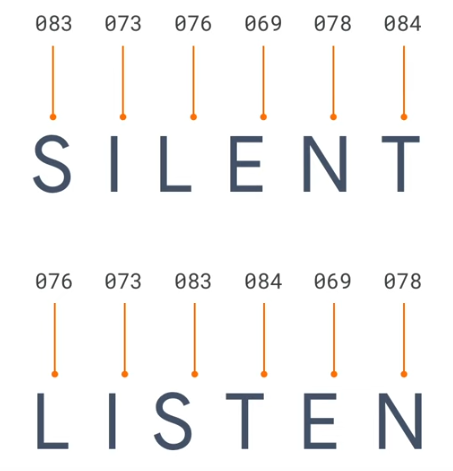

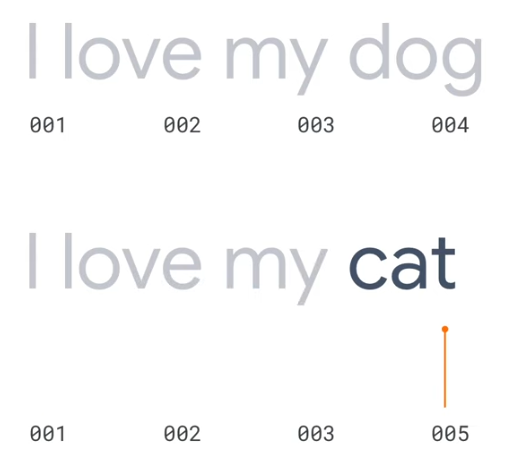

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
sentences = [
    'I love my dog',
    'I love my cat'
]

In [ ]:
# tokenizing the words

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


In [ ]:
# updating sentences list

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!'
]

In [ ]:
# now tokenizing and checking again

tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


## Part2 - Turning sentences into data

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# sentences list

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [ ]:
# converting text to sequences
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
# showing the result
print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


### OOV token

case: words never seen before

In [ ]:
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

In [ ]:
test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[4, 2, 1, 3], [1, 3, 1]]


there is no number for new words in the sequenced numbers,

so the length of the sequence does not match the length of the sentences

there is a tricks for not to lose the length of the sentence

Out Of Vocabulary: OOV token

In [ ]:
# using oov token property for unseen words
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

In [ ]:
test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [ ]:
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


so the tokenizer uses oov token for the unseen words,

this way we do not loose the length of the sentences for unseen words

### Padding

how neural networks handle sentences with different length?

making common length sequences for all sentences

the advanced way is to use RaggedTensor

the simpler way is to use padding

In [ ]:
# using padding for making common length sequences for all sentences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
padded = pad_sequences(sequences)
print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


here the longest sentence is of length 7 thats why the length of all sequence here is 7. the smaller sequences have preceeding 0s for padding

notice that 0 is used for padding while 1 is for oov.

we can also use the padding at the end.

padded = pad_sequences(sequences, padding='post')

we can also limit the size of the sequence instead of using the length of the lengthiest sentence.

padded = pad_sequences(sequences, padding='post', maxlen = 5)

What if sentences are longer? from where do they truncate?
specify from where to truncate

padded = pad_sequences(sequences, padding='post', maxlen = 5, truncating='post')

my guess is: it is better to have similar value(post/pre) for padding and truncating parameter. otherwise we may padd in the front and truncate at the back, this way the sequence may loose many valuable info

## Part3 - Model training to recognize sentiment

dataset link: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection?resource=download

### loading the file

In [ ]:
# importing library for converting json to python readable file
import json

In [ ]:
datastore = []
with open('/content/drive/MyDrive/Colab Notebooks/NLP/Sarcasm_Headlines_Dataset.json', 'r') as f:
  for l in f:
    json_val = json.loads(l)
    datastore.append(json_val)

In [ ]:
datastore

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [ ]:
s = []
l = []
urls = []
for item in datastore:
  s.append(item['headline'])
  l.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [ ]:
len(s)

26709

In [ ]:
s[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [ ]:
l[0]

0

In [ ]:
urls[0]

'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5'

### tokenization, sequencing and padding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(oov_token = '<OOV>')
tokenizer.fit_on_texts(s)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(s)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


### splitting the data and fitting only with training data

In [23]:
training_size = 20000
vocab_size = 10000
oov_tok = '<OOV>'
max_length = 100
trunc_type='post'
pad_type='post'
embedding_dim = 16

In [24]:
training_sentences = s[0:training_size]
testing_sentences = s[training_size:]
training_labels = l[0:training_size]
testing_labels = l[training_size:]

In [25]:
# tokenizing only the training data
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding=pad_type, truncating=trunc_type)

In [26]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                                padding=pad_type, truncating=trunc_type)

### embedding and model building

In [28]:
import tensorflow as tf

In [32]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [33]:
epochs = 30
history = model.fit(training_padded, training_labels, epochs = epochs, validation_data=(testing_padded, testing_labels), verbose = 2)

Epoch 1/30
625/625 - 2s - loss: 0.6769 - accuracy: 0.5638 - val_loss: 0.6375 - val_accuracy: 0.6159 - 2s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4935 - accuracy: 0.7975 - val_loss: 0.4093 - val_accuracy: 0.8319 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3378 - accuracy: 0.8669 - val_loss: 0.3654 - val_accuracy: 0.8456 - 2s/epoch - 4ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2811 - accuracy: 0.8899 - val_loss: 0.3485 - val_accuracy: 0.8568 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2442 - accuracy: 0.9054 - val_loss: 0.3465 - val_accuracy: 0.8553 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.2161 - accuracy: 0.9166 - val_loss: 0.3456 - val_accuracy: 0.8548 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1937 - accuracy: 0.9270 - val_loss: 0.3524 - val_accuracy: 0.8547 - 2s/epoch - 2ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1742 - accuracy: 0.9362 - val_loss: 0.3629 - val_accuracy: 0.8536 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

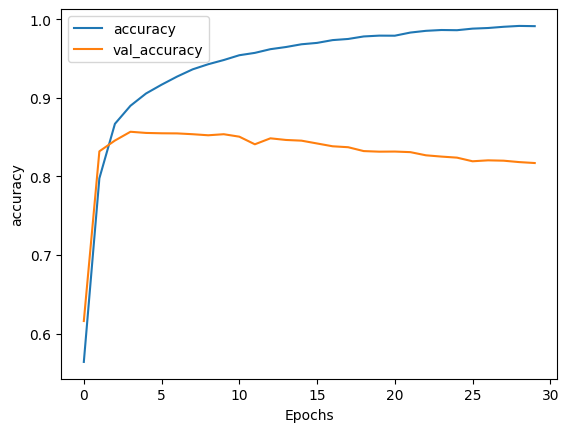

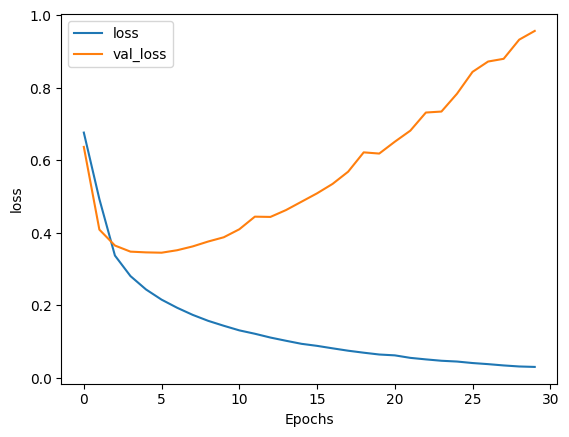

In [34]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [35]:
sentence = [
    "granny starting to fear spiders in the garden might be real",
    "game of thrones season finale showing this sunday night"
]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length,
                       padding=pad_type,
                       truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 74ms/step
[[8.9039946e-01]
 [5.5994813e-05]]


In [36]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


## Part4 - ML with Recurrent Neural Networks (RNN)

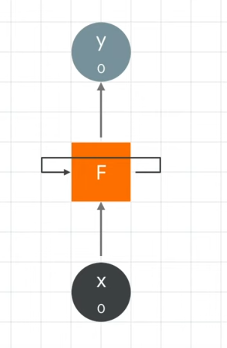

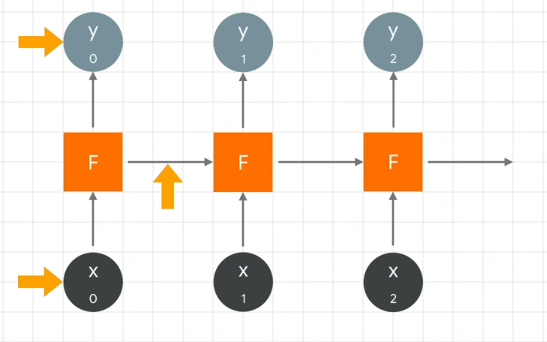

## Part5 - Long Short-Term Memory for NLP (LSTM)

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 714,369
Trainable params: 714,369
Non-trainable params: 0
_________________________________________________________________


In [42]:
epochs = 30
history = model.fit(training_padded, training_labels, epochs = epochs, validation_data=(testing_padded, testing_labels), verbose = 2)

Epoch 1/30
625/625 - 52s - loss: 0.3862 - accuracy: 0.8163 - val_loss: 0.3357 - val_accuracy: 0.8571 - 52s/epoch - 84ms/step
Epoch 2/30
625/625 - 44s - loss: 0.1973 - accuracy: 0.9222 - val_loss: 0.3502 - val_accuracy: 0.8578 - 44s/epoch - 71ms/step
Epoch 3/30
625/625 - 45s - loss: 0.1064 - accuracy: 0.9607 - val_loss: 0.3956 - val_accuracy: 0.8459 - 45s/epoch - 72ms/step
Epoch 4/30
625/625 - 46s - loss: 0.0622 - accuracy: 0.9786 - val_loss: 0.6057 - val_accuracy: 0.8462 - 46s/epoch - 73ms/step
Epoch 5/30
625/625 - 48s - loss: 0.0344 - accuracy: 0.9879 - val_loss: 0.6633 - val_accuracy: 0.8414 - 48s/epoch - 76ms/step
Epoch 6/30
625/625 - 47s - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.8180 - val_accuracy: 0.8435 - 47s/epoch - 75ms/step
Epoch 7/30
625/625 - 48s - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.8445 - val_accuracy: 0.8413 - 48s/epoch - 76ms/step
Epoch 8/30
625/625 - 47s - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.8845 - val_accuracy: 0.8351 - 47s/epoch - 76ms/step


KeyboardInterrupt: ignored

## Part6 - Training an AI to create poetry

In [22]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np

In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2023-07-07 15:16:12--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2023-07-07 15:16:12 (108 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [24]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # adding 1 for oov token

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

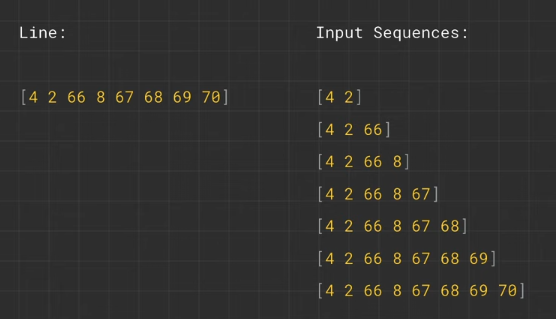

normal sequence vs n_gram_sequence

In [25]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [26]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [27]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [28]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [29]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [30]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)

# print model.summary()
print(model)

Epoch 1/100
377/377 [==============================] - 39s 92ms/step - loss: 6.6463 - accuracy: 0.0757
Epoch 2/100
377/377 [==============================] - 34s 89ms/step - loss: 5.7965 - accuracy: 0.1106
Epoch 3/100
377/377 [==============================] - 34s 89ms/step - loss: 4.9562 - accuracy: 0.1568
Epoch 4/100
377/377 [==============================] - 35s 93ms/step - loss: 4.1211 - accuracy: 0.2202
Epoch 5/100
377/377 [==============================] - 34s 89ms/step - loss: 3.8107 - accuracy: 0.2711
Epoch 6/100
377/377 [==============================] - 38s 100ms/step - loss: 2.7203 - accuracy: 0.4019
Epoch 7/100
377/377 [==============================] - 34s 89ms/step - loss: 2.1018 - accuracy: 0.5190
Epoch 8/100
377/377 [==============================] - 34s 90ms/step - loss: 1.7158 - accuracy: 0.5954
Epoch 9/100
377/377 [==============================] - 37s 97ms/step - loss: 1.4376 - accuracy: 0.6632
Epoch 10/100
377/377 [==============================] - 36s 95ms/step - 

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 2690)              809690    
                                                                 
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [32]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

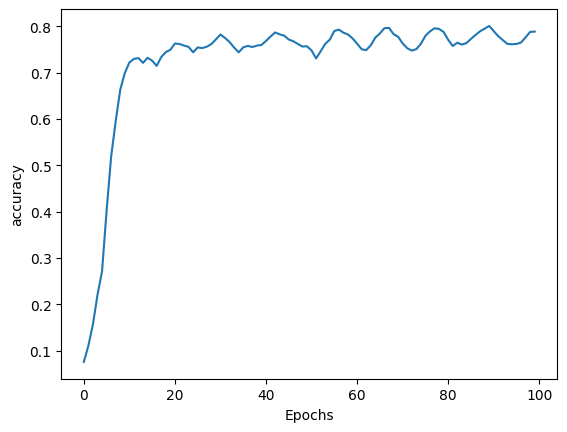

In [33]:
plot_graphs(history, 'accuracy')

In [38]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding='pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 29ms/step
I've got a bad feeling about this so so and the hemp rope so on the will find the softly and farewell my mary kind old hall my love gone by loved round the other where hes stationed be kind my true love forever else ill expire love forever delight in the juice of barley alas kept i should i his home with thee thou gone and shes in danger when writin boy over she comes their eyes were toe i did slaughter love gone says outspread and jury across this as row in their bay twould set your home with your auld rigadoo gone and ive
